In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')


!kaggle datasets download -d brendan45774/test-file -p ./data --unzip

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0




  0%|          | 0.00/11.2k [00:00<?, ?B/s]
100%|██████████| 11.2k/11.2k [00:00<00:00, 5.46MB/s]


In [3]:
titanic_data = pd.read_csv('./data/tested.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
# Cleaning the data
# Drop unecessary columns
titanic_clean = titanic_data.drop(columns=['Cabin','Embarked'])

# fill null values in Age column
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].mean())

# fill null values in Fare column
titanic_clean['Fare'] = titanic_clean['Fare'].fillna(titanic_clean['Fare'].mean())

# Change male values to 0 and female values to 1
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male' : 0, 'female' : 1})

# Change Age from float type to int type
titanic_clean['Age'] = titanic_clean['Age'].round().astype(int)

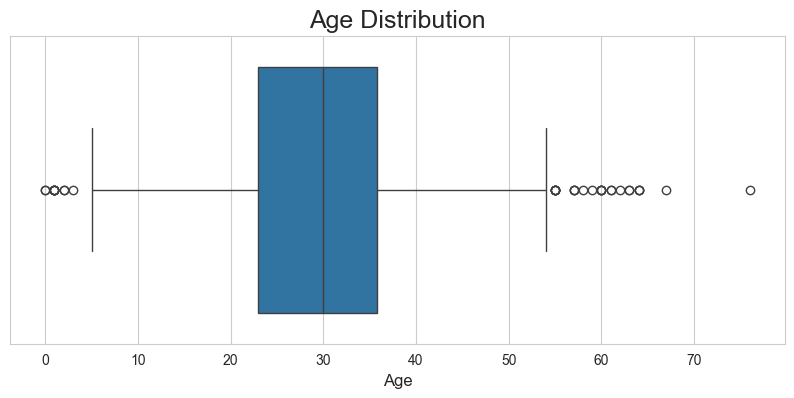

In [38]:
# Age Distribution
plt.figure(figsize=(10,4))
sns.boxplot(x = 'Age', data=titanic_clean)
plt.title('Age Distribution', size=18)
plt.xlabel('Age', size=12)
plt.show()

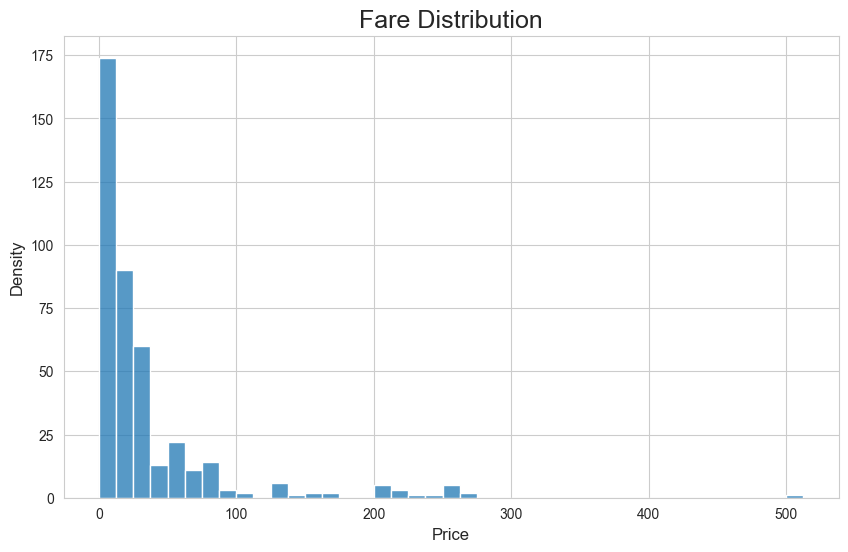

In [ ]:

# Fare Distribution
plt.figure(figsize=(10,6))
sns.histplot(titanic_clean['Fare'])
plt.title('Fare Distribution', size=18)
plt.xlabel('Price', size=12)
plt.ylabel('Density', size=12)
plt.show()


In [46]:
# Ticket Class vs. Survival Rate
# 0 = not : 1 = survived
table = pd.crosstab(titanic_clean['Pclass'], titanic_clean['Survived'])
print(table)

survival_rate = titanic_clean.groupby('Pclass')['Survived'].mean() * 100
print(survival_rate)

Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


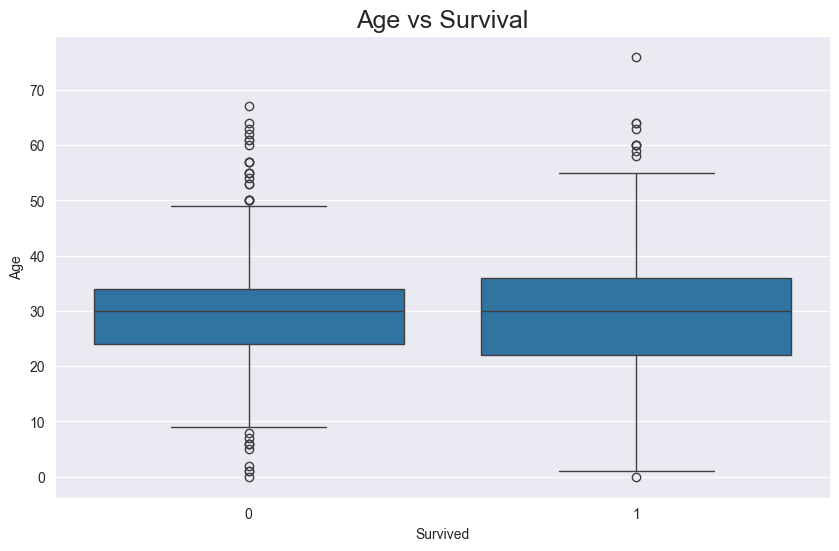

In [52]:
# Age vs. Survival
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')
sns.boxplot(x='Survived',y='Age',data=titanic_clean)
plt.title('Age vs Survival',size=18);